Implementing the XOR Gate using Neural networks:
Objective : x1, x2 Given the inputs we need to find the weights of expected Y values using Neural Network Algorithm.

| x1 | x2 | Y |
| --- | --- | --- |
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |


In [1]:
# Importing the library
import numpy as np

    Using Sigmoid Function for Sigmoid Neuron.
    The output of the sigmoid neuron is a continuous which outputs values between 0 and 1.

In [2]:
# Sigmoid function used as sigmoid neuron as node.
# the value of activation is equal to the weighted sum of its inputs 
def sigmoid(x):
    return 1/(1+ np.exp(-x))

In [3]:
def sigmoid_derivative(x):
    return x * (1 - x)

In [4]:
# initializing the given inputs into numpy array.
# easy and fast to compute.
given_inputs = np.array([[0,0],[0,1],[1,0],[1,1]])

# initializing the expected outputs as numpy array.
actual_output = np.array([[0],[1],[1],[0]])

In [5]:
# initializing epochs and learning rate for the algorithm.
epochs = 12000
learning_rate = 0.1

    Layers of Neurons:
    1. Input layer
    2. Hidden layer
    3. Output layer.

In [6]:
# initializing the layers of neurons
input_layer_neurons = 2
hidden_layer_neurons = 2
output_layer_neurons = 1

In [7]:
# randomly initialzing the weights and biases for Neurons layers
hidden_weights = np.random.uniform(size=(input_layer_neurons,
                                         hidden_layer_neurons))
hidden_bias = np.random.uniform(size=(1, 
                                      hidden_layer_neurons))
output_weights = np.random.uniform(size=(hidden_layer_neurons, 
                                      output_layer_neurons))
output_bias = np.random.uniform(size=(1, 
                                      output_layer_neurons))

In [8]:
print(f"Hidden weights: {hidden_weights}")
print()
print(f"Hidden biases: {hidden_bias}")
print()
print(f"Output weights: {output_weights}")
print()
print(f"Output biases: {output_bias}")
print()

Hidden weights: [[0.35346371 0.66066269]
 [0.45974509 0.23236066]]

Hidden biases: [[0.68189775 0.09233309]]

Output weights: [[0.13332064]
 [0.94603767]]

Output biases: [[0.77367676]]



    Neural Network Training Algorithm.
For the neural network to be able to linearly segregate the input data depending on the output patterns, it needs to create two distinct decision planes. The idea of hidden layers is used to achieve this. Given that two decision planes are required, the neural network will have an input layer with two nodes (X1, X2), a hidden layer with two nodes, and an output layer with one node (Y). Consequently, the neural network appears as follows:

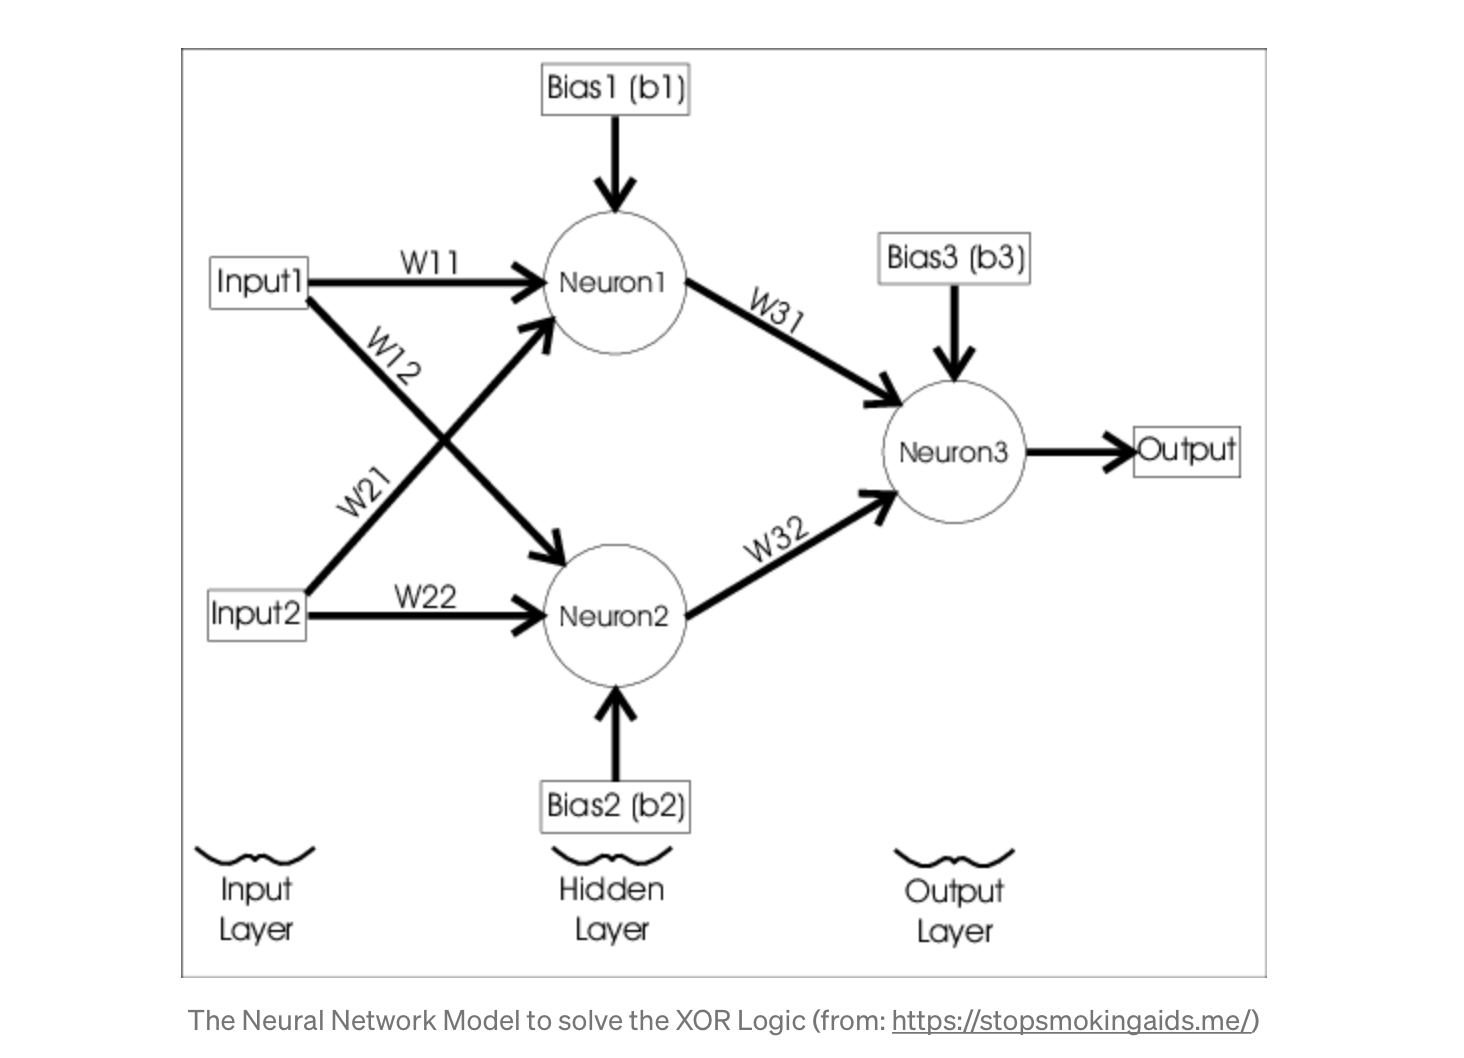


In [9]:
for _ in range(epochs):
    
    # forward propagation
    h_layer_activation = np.dot(given_inputs,hidden_weights)
    h_layer_activation += hidden_bias
    h_layer_output = sigmoid(h_layer_activation)
    opt_layer_activation = np.dot(h_layer_output,output_weights)
    opt_layer_activation += output_bias
    predicted_output = sigmoid(opt_layer_activation)

    # backpropagation
    error = actual_output - predicted_output
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    
    error_hidden_layer = d_predicted_output.dot(output_weights.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(h_layer_output)

    # update weights and biases
    output_weights += h_layer_output.T.dot(d_predicted_output) * learning_rate
    output_bias += np.sum(d_predicted_output,axis=0,keepdims=True) * learning_rate
    hidden_weights += given_inputs.T.dot(d_hidden_layer) * learning_rate
    hidden_bias += np.sum(d_hidden_layer,axis=0,keepdims=True) * learning_rate


In [10]:
print(f"Hidden weights after Neural Networks: {hidden_weights}")
print()
print(f"Hidden biases after Neural Networks: {hidden_bias}")
print()
print(f"Output weights after Neural Networks: {output_weights}")
print()
print(f"Output biases after Neural Networks: {output_bias}")
print()

Hidden weights after Neural Networks: [[3.76778357 5.9150091 ]
 [3.77690264 5.96081685]]

Hidden biases after Neural Networks: [[-5.78386008 -2.51635408]]

Output weights after Neural Networks: [[-8.45510012]
 [ 7.73605112]]

Output biases after Neural Networks: [[-3.47091217]]



In [11]:
print(f"Output of given inputs weights through Neural Neworks after 12000 epochs: {predicted_output}")

Output of given inputs weights through Neural Neworks after 12000 epochs: [[0.05123525]
 [0.95364802]
 [0.95352276]
 [0.04972305]]


REFERENCES
1. https://towardsdatascience.com/implementing-the-xor-gate-using-backpropagation-in-neural-networks-c1f255b4f20d
2. https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwil5v-B6eL7AhVSkXIEHZf6Co4QFnoECAoQAQ&url=https%3A%2F%2Fanalyticsindiamag.com%2Fxor-problem-with-neural-networks-an-explanation-for-beginners%2F&usg=AOvVaw30NU_L7TICKIn-bFxtbEi2
3. https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwil5v-B6eL7AhVSkXIEHZf6Co4QFnoECAsQAQ&url=https%3A%2F%2Fmedium.com%2Fanalytics-vidhya%2Fcoding-a-neural-network-for-xor-logic-classifier-from-scratch-b90543648e8a&usg=AOvVaw06hmoI7EIukqhWPkujdmxN
4. https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwil5v-B6eL7AhVSkXIEHZf6Co4QFnoECAkQAQ&url=https%3A%2F%2Fwww.geeksforgeeks.org%2Fimplementation-of-artificial-neural-network-for-xor-logic-gate-with-2-bit-binary-input%2F&usg=AOvVaw3rCh71pbNqN9C0hp98TJj3